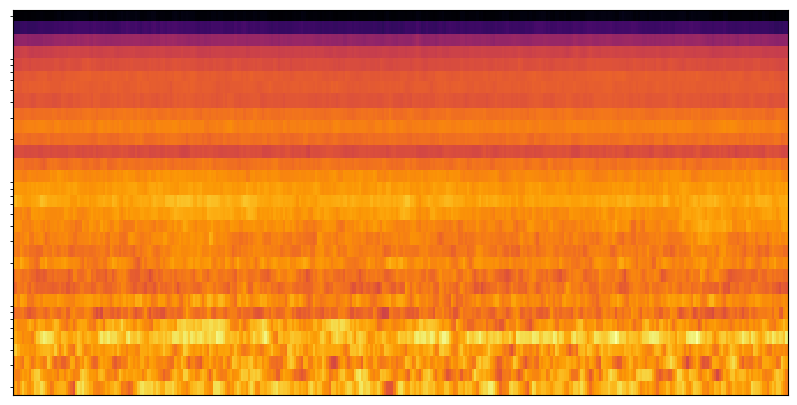

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import re
from datetime import datetime

csv_file = '15_09__01_59.csv'

# Read the CSV file
data = pd.read_csv(csv_file)

# Convert timestamp column to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Calculate the time differences in seconds
time_differences = data['timestamp'].diff().dt.total_seconds().fillna(0).cumsum()

# Selecting only the octave band columns
octave_bands = data.filter(regex='terts')

# Function to extract frequency from column name
def extract_frequency(col_name):
    match = re.search(r'\d+', col_name)
    return float(match.group()) if match else None

# Preparing the data for the spectrogram
frequencies = [extract_frequency(col) for col in octave_bands.columns]
frequencies = [freq for freq in frequencies if freq is not None]

plt.figure(figsize=(10, 5))
frequencies_array = np.array(frequencies)
octave_bands_values = octave_bands.T.values  # Transpose and get numpy array for plotting

# Use SymLogNorm for a logarithmic color scale
norm = colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=octave_bands_values.min(), vmax=octave_bands_values.max(), base=10)

# pcolormesh for plotting with 'inferno' colormap
plt.pcolormesh(time_differences, frequencies_array, octave_bands_values, shading='auto', norm=norm, cmap='inferno', edgecolor='none')

# Set the y-scale to log
plt.yscale('log')

# Hide the axis labels and ticks
plt.xticks([])
plt.yticks([])

# Save the figure
plt.savefig('spectrogram.png', bbox_inches='tight', pad_inches=0)


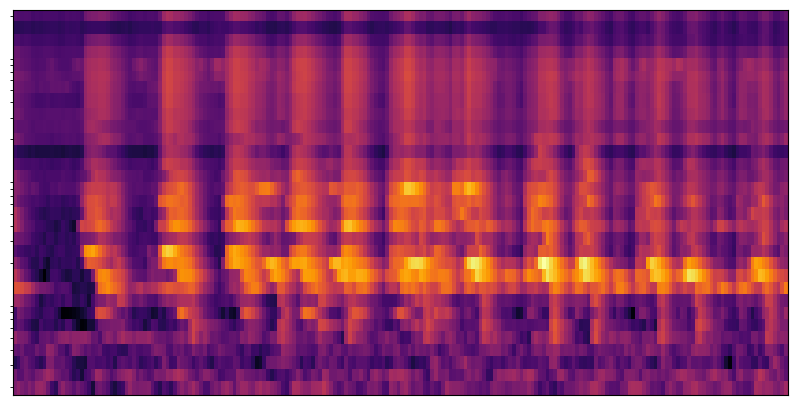